<a href="https://colab.research.google.com/github/blufury/Class-projects/blob/master/FinalProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [14]:
df = pd.read_csv('/content/obesity_prediction.csv')

# Encoding, Test Split, Scaling

In [15]:
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop('Obesity', axis=1)
y = df['Obesity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training

In [19]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

# Model Performance and Visuals


Model: Naive Bayes
Accuracy: 0.59
Precision: 0.64
Recall: 0.59
F1-Score: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.74      0.71        54
           1       0.67      0.45      0.54        58
           2       0.41      0.50      0.45        70
           3       0.42      0.95      0.58        60
           4       1.00      0.98      0.99        65
           5       0.63      0.29      0.40        58
           6       0.71      0.17      0.28        58

    accuracy                           0.59       423
   macro avg       0.65      0.58      0.56       423
weighted avg       0.64      0.59      0.57       423



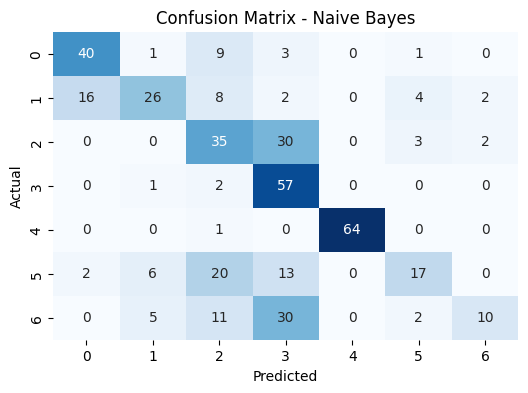

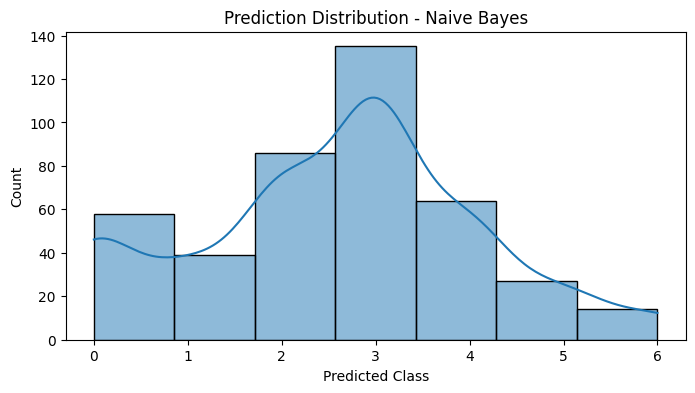


Model: Neural Network
Accuracy: 0.91
Precision: 0.92
Recall: 0.91
F1-Score: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        54
           1       0.86      0.76      0.81        58
           2       0.92      0.99      0.95        70
           3       1.00      0.97      0.98        60
           4       0.98      0.98      0.98        65
           5       0.81      0.88      0.84        58
           6       0.93      0.86      0.89        58

    accuracy                           0.91       423
   macro avg       0.91      0.91      0.91       423
weighted avg       0.92      0.91      0.91       423



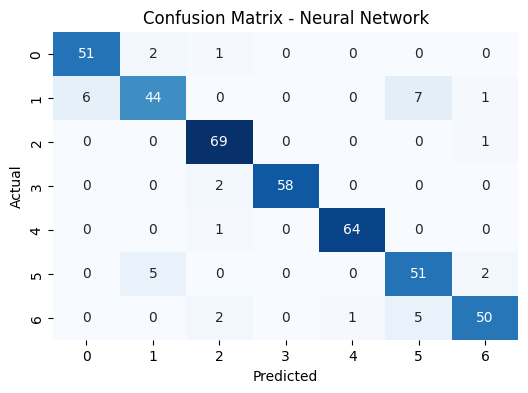

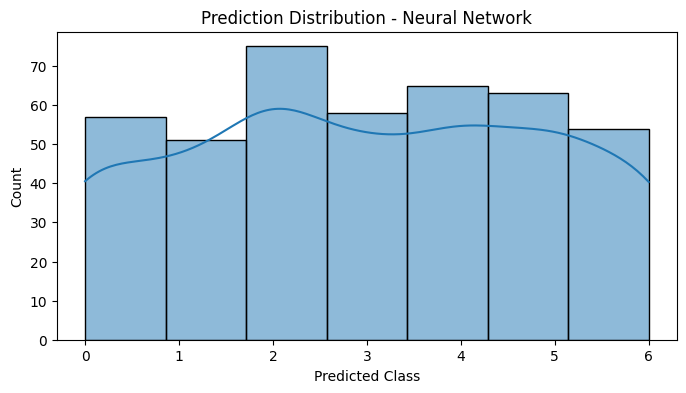

In [25]:
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_true, y_pred)

    print(f"\nModel: {model_name}")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Classification Report:\n{classification_report(y_true, y_pred)}")

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    plt.figure(figsize=(8,4))
    sns.histplot(y_pred, kde=True, bins=len(np.unique(y_pred)))
    plt.title(f"Prediction Distribution - {model_name}")
    plt.xlabel("Predicted Class")
    plt.ylabel("Count")
    plt.show()


evaluate_model(y_test, y_pred_nb, "Naive Bayes")

evaluate_model(y_test, y_pred_nn, "Neural Network")